In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.utils import to_categorical
from keras import metrics
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/url_svmlight/url_svmlight/all.csv',header = None)
data = data[0:1000000]
label = data[0]
label = label.replace(-1,0)
data = data.drop(0,axis=1)
data.shape

C:\Users\soura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1000000, 114)

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,105,106,107,108,109,110,111,112,113,114
0,0.0,0.0,0.0,0.078838,0.124138,0.117647,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.165975,0.103448,0.176471,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.091286,0.144828,0.117647,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.058091,0.089655,0.176471,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.078838,0.131034,0.117647,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
label.value_counts()

0    663430
1    336570
Name: 0, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,label,stratify=label,random_state=42)

In [ ]:
n_features = X_train.shape[1]
input_shape = (None,1,n_features)
X_train,X_test,Y_train,Y_test = np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)
n_timesteps, n_features, n_outputs = 1, X_train.shape[1], 2
X_train = X_train.reshape((X_train.shape[0],1 , 1, n_features))
X_test = X_test.reshape((X_test.shape[0],1 , 1, n_features))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=input_shape))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size = 1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(228))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(n_outputs,activation = 'softmax'))

In [ ]:
epoch, batch_size, verbose= 16,32,1
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mse', 'mae',])
	# fit network
history = model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs=epoch, batch_size=batch_size, verbose=verbose)
	# evaluate model


Train on 750000 samples, validate on 250000 samples
Epoch 1/16
750000/750000 [==============================] - 231s 308us/step - loss: 0.0173 - acc: 0.9781 - mean_squared_error: 0.0173 - mean_absolute_error: 0.0319 - val_loss: 0.0168 - val_acc: 0.9785 - val_mean_squared_error: 0.0168 - val_mean_absolute_error: 0.0352
Epoch 2/16
750000/750000 [==============================] - 226s 301us/step - loss: 0.0170 - acc: 0.9785 - mean_squared_error: 0.0170 - mean_absolute_error: 0.0309 - val_loss: 0.0170 - val_acc: 0.9785 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.0313
Epoch 3/16
750000/750000 [==============================] - 303s 404us/step - loss: 0.0167 - acc: 0.9788 - mean_squared_error: 0.0167 - mean_absolute_error: 0.0306 - val_loss: 0.0157 - val_acc: 0.9798 - val_mean_squared_error: 0.0157 - val_mean_absolute_error: 0.0331
Epoch 4/16
750000/750000 [==============================] - 228s 304us/step - loss: 0.0166 - acc: 0.9789 - mean_squared_error: 0.0166 - mean_abs

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

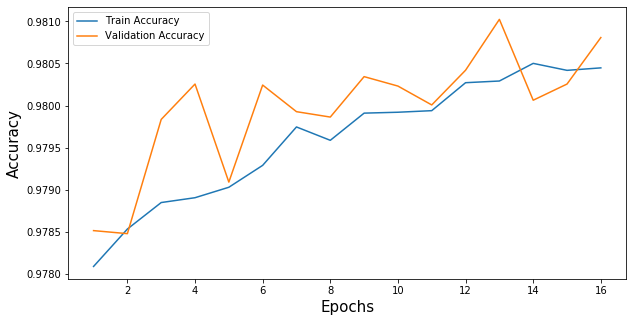

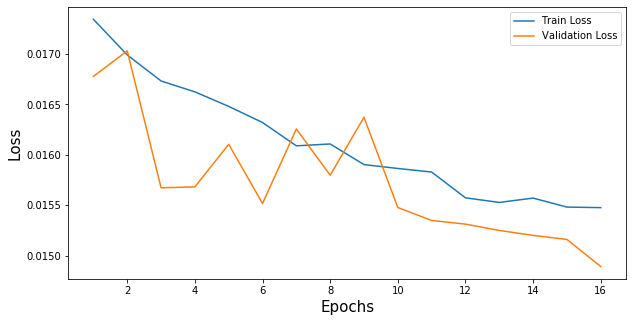

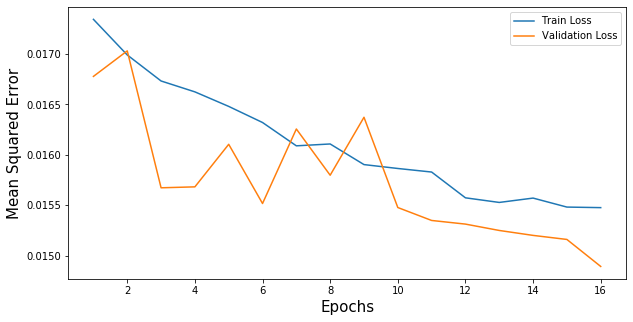

In [ ]:
epochs = [i for i in range(1,epoch+1)]
plt.figure(num=1,figsize=(10,5))
plt.plot(epochs,acc,label= 'Train Accuracy')
plt.plot(epochs,val_acc,label= 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)

plt.figure(num=2,figsize=(10,5))
plt.plot(epochs,loss,label= 'Train Loss')
plt.plot(epochs,val_loss,label= 'Validation Loss')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Loss',fontsize = 15)

plt.figure(num=3,figsize=(10,5))
plt.plot(epochs,mse,label= 'Train_')
plt.plot(epochs,val_mse,label= 'Validation Loss')
plt.legend()
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Mean Squared Error',fontsize = 15)

plt.show()